Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2022/2023  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2022 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **23. listopada 2022. u 23:59h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(1)
FI = poly.fit_transform(X)

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
from numpy import linalg
w_literal = inv(FI.T@FI)@FI.T@y
w = pinv(FI)@y
print(w_literal)
print(w)

[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [5]:
from sklearn.metrics import mean_squared_error
print(f"Skup D: \n{X}")
print(f"Tezine w: {w}")
h = w@FI.T
print(f"Predikcije h: {h}")
err_literal = 1/2 * sum((y - h)**2)
print(f"Greska koristenjem formule: {err_literal}")
err = mean_squared_error(y, h)
print(f"Greska koristenjem mean_squared_error: {err}")

Skup D: 
[[0]
 [1]
 [2]
 [4]]
Tezine w: [2.2        0.45714286]
Predikcije h: [2.2        2.65714286 3.11428571 4.02857143]
Greska koristenjem formule: 4.085714285714285
Greska koristenjem mean_squared_error: 2.0428571428571427


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [6]:
print("Ako pokusamo invertirati matricu javlja se greska, inverz ne postoji. Matrica mora biti kvadratna")
#print(inv(FI))
poly = PolynomialFeatures(3)
FI2 = poly.fit_transform(X)
print(FI2)
print(inv(FI2)@y)
print("Ako preslikamo u prostor dimenzije 3, matrica postaje kvadratna te ima inverz, no to isto ovisi o skupu primjera D.")

Ako pokusamo invertirati matricu javlja se greska, inverz ne postoji. Matrica mora biti kvadratna
[[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  4. 16. 64.]]
[ 4.         -5.91666667  3.375      -0.45833333]
Ako preslikamo u prostor dimenzije 3, matrica postaje kvadratna te ima inverz, no to isto ovisi o skupu primjera D.


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [7]:
from sklearn.linear_model import LinearRegression
#U fit ne stavljamo FI nego X, LinearRegression sam dodaje dummy jedinice
reg = LinearRegression().fit(X, y)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(y, reg.predict(X)))

2.2
[0.45714286]
2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [8]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    n = normal(0, noise, size = (shape(X)[0], 1))
    y = f(X) + n
    return y

In [9]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [10]:
def f(x):
    return 5 + x - 2 * x**2 - 5 * x**3

X = make_instances(-5, 5, 50)
y = make_labels(X, f, 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

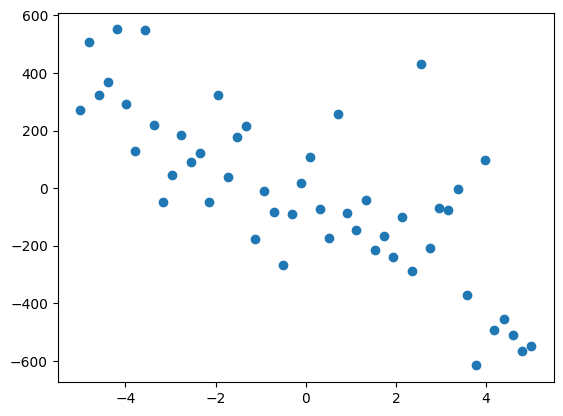

In [11]:
plt.scatter(X, y)
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

w: [-11.95601803] [[-26.45398349  -0.56518932  -3.10449679]]


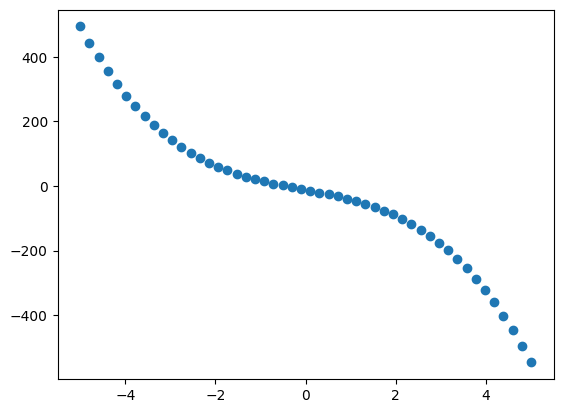

Pogreska: 30233.665338202027


In [12]:
poly = PolynomialFeatures(3)
FI = poly.fit_transform(X)
reg = LinearRegression().fit(FI[:,1:], y)
w0 = reg.intercept_
w = reg.coef_
print(f"w: {w0} {w}")
plt.scatter(X, reg.predict(FI[:, 1:]))
plt.show()
print(f"Pogreska: {mean_squared_error(y, reg.predict(FI[:, 1:]))}")

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Pogreska ucenja za stupanj d = 1 iznosi 34116.82589738004
Pogreska ucenja za stupanj d = 3 iznosi 30233.665338202027
Pogreska ucenja za stupanj d = 5 iznosi 28846.23497744639
Pogreska ucenja za stupanj d = 10 iznosi 27580.825357564725
Pogreska ucenja za stupanj d = 20 iznosi 22627.621324554468


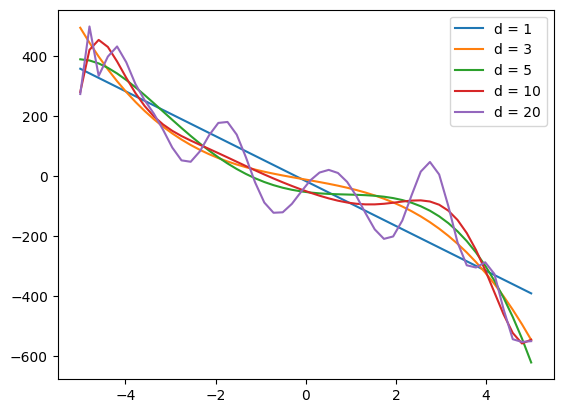

In [13]:
degrees = [1,3,5,10,20]
for d in degrees:
    poly = PolynomialFeatures(d)
    FI = poly.fit_transform(X)
    reg = LinearRegression().fit(FI[:,1:], y)
    h = reg.predict(FI[:, 1:])
    plt.plot(X, h, label = f"d = {d}")
    print(f"Pogreska ucenja za stupanj d = {d} iznosi {mean_squared_error(y, h)}")
plt.legend()
plt.show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

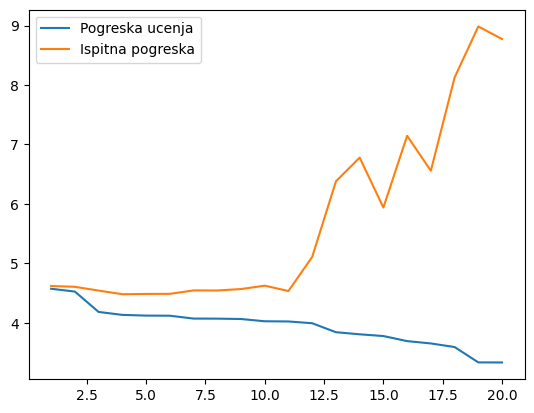

In [46]:
from sklearn.model_selection import train_test_split
degrees = np.arange(1, 21)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
train_error = []
test_error = []
for d in degrees:
    poly = PolynomialFeatures(d)
    FI_train = poly.fit_transform(X_train)
    FI_test = poly.transform(X_test)
    reg = LinearRegression().fit(FI_train[:, 1:], y_train)
    err_train = mean_squared_error(y_train, reg.predict(FI_train[:, 1:]))
    err_test = mean_squared_error(y_test, reg.predict(FI_test[:, 1:]))
    train_error.append(log10(err_train))
    test_error.append(log10(err_test))

plt.plot(degrees, train_error, label = "Pogreska ucenja")
plt.plot(degrees, test_error, label = "Ispitna pogreska")
plt.legend()

plt.show()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

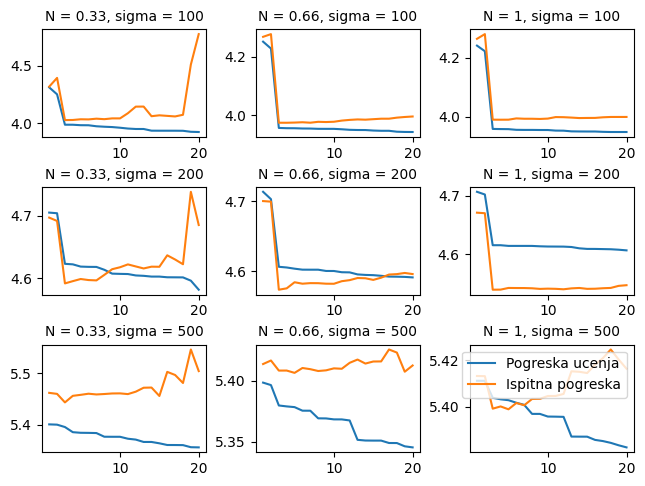

In [107]:
def split_dataset(X, y, N):
    if N == 1:
        return X, y
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 1 - N)
    return X_tr, y_tr

degrees = np.arange(1,21)

X = make_instances(-5, 5, 1000)
X_train, X_test = train_test_split(X, test_size = 0.5)

fig, ax = plt.subplots(3, 3)
i = 0
for sigma in [100, 200, 500]:
    y_train = make_labels(X_train, f, sigma)
    y_test = make_labels(X_test, f, sigma)
    j = 0
    for N in [0.33, 0.66, 1]:
        X_train_sampled, y_train_sampled = split_dataset(X_train, y_train, N)
        X_test_sampled, y_test_sampled = split_dataset(X_test, y_test, N)
        train_error = []
        test_error = []
        for d in degrees:
            poly = PolynomialFeatures(d)
            FI_train = poly.fit_transform(X_train_sampled)
            FI_test = poly.transform(X_test_sampled)
            reg = LinearRegression().fit(FI_train[:, 1:], y_train_sampled)
            err_train = mean_squared_error(y_train_sampled, reg.predict(FI_train[:, 1:]))
            err_test = mean_squared_error(y_test_sampled, reg.predict(FI_test[:, 1:]))
            train_error.append(log10(err_train))
            test_error.append(log10(err_test))
        
        ax[i, j].set_title(f"N = {N}, sigma = {sigma}", fontsize = "medium")
        ax[i, j].plot(degrees, train_error, label = "Pogreska ucenja")
        ax[i, j].plot(degrees, test_error, label = "Ispitna pogreska")
        j += 1
    i += 1

fig.tight_layout(pad = 0.5)
plt.legend()
plt.show()

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [52]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

poly = PolynomialFeatures(3)
FI = poly.fit_transform(X)

fake_identity = np.identity(FI.shape[1])
fake_identity[0,0] = 0

for l in [0, 1, 10]:
    lambda_array = fake_identity * l
    w = inv(FI.T@FI + lambda_array)@FI.T@y
    print(w)

[ 4.         -5.91666667  3.375      -0.45833333]
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [55]:
from sklearn.linear_model import Ridge
for alpha in [0, 1, 10]:
    clf = Ridge(alpha)
    clf.fit(FI[:,1:], y)
    print(str(clf.intercept_) + "  " + str(clf.coef_))

3.9999999999999867  [-5.91666667  3.375      -0.45833333]
3.0569614512471652  [-0.69079365 -0.2831746   0.1445805 ]
2.4944418431229725  [-0.15897295 -0.13423067  0.0815601 ]


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

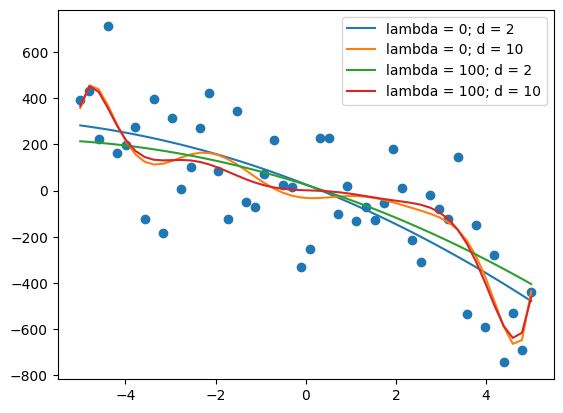

In [59]:
X = make_instances(-5, 5, 50)
y = make_labels(X, f, 200)

for alpha in [0, 100]:
    for d in [2, 10]:
        poly = PolynomialFeatures(d)
        FI = poly.fit_transform(X)
        clf = Ridge(alpha)
        clf.fit(FI[:, 1:], y)
        plt.plot(X, clf.predict(FI[:, 1:]), label = f"lambda = {alpha}; d = {d}")
plt.scatter(X, y)
plt.legend()
plt.show()

### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


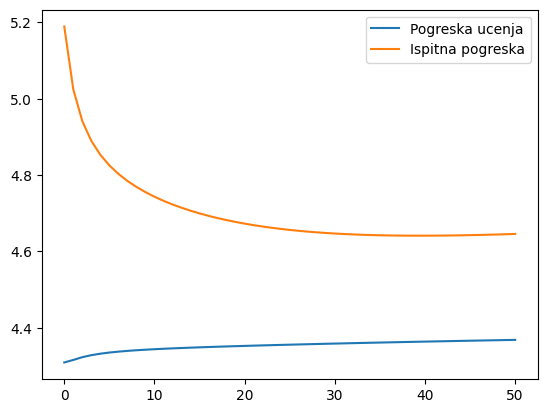

In [73]:
lambdas = np.arange(0, 51)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
poly = PolynomialFeatures(10)
FI_train = poly.fit_transform(X_train)
FI_test = poly.transform(X_test)
train_error = []
test_error = []
for alpha in lambdas:
    clf = Ridge(alpha).fit(FI_train[:, 1:], y_train)
    err_train = mean_squared_error(y_train, clf.predict(FI_train[:, 1:]))
    err_test = mean_squared_error(y_test, clf.predict(FI_test[:, 1:]))
    train_error.append(log10(err_train))
    test_error.append(log10(err_test))

plt.plot(lambdas, train_error, label = "Pogreska ucenja")
plt.plot(lambdas, test_error, label = "Ispitna pogreska")
plt.legend()
plt.show()

### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [20]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

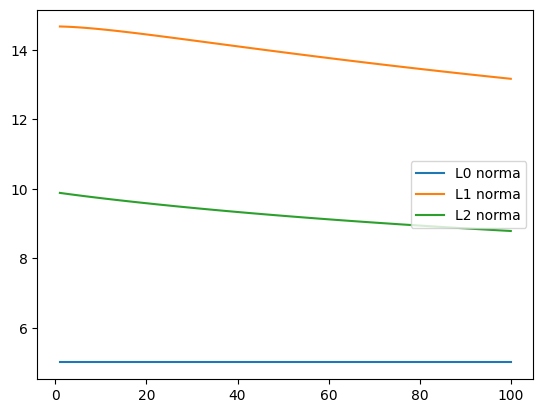

5.0


In [94]:
from sklearn.linear_model import Ridge

X = make_instances(-5, 5, 50)
y = make_labels(X, f, 200)

poly = PolynomialFeatures(5)
FI = poly.fit_transform(X)

alphas = np.arange(1, 101)

l0_norms = []
l1_norms = []
l2_norms = []

for alpha in alphas:
    clf = Ridge(alpha).fit(FI[:, 1:], y)
    l0_norms.append(norm(clf.coef_[0], ord= 0))
    l1_norms.append(norm(clf.coef_[0], ord= 1))
    l2_norms.append(norm(clf.coef_[0], ord= 2))
    
plt.plot(alphas, l0_norms, label = "L0 norma")
plt.plot(alphas, l1_norms, label = "L1 norma")
plt.plot(alphas, l2_norms, label = "L2 norma")

plt.legend()
plt.show()

print(l0_norms[99])

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

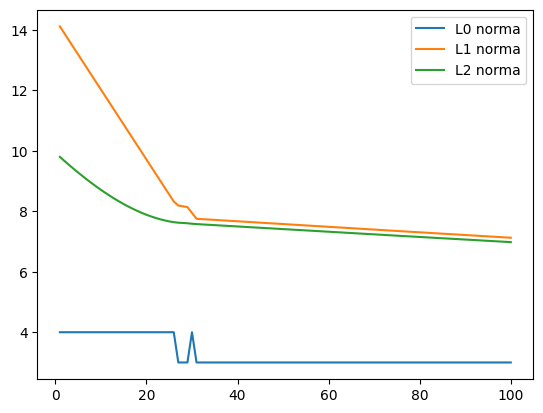

3.0


In [99]:
from sklearn.linear_model import Lasso

l0_norms = []
l1_norms = []
l2_norms = []

for alpha in alphas:
    clf = Lasso(alpha).fit(FI[:, 1:], y)
    l0_norms.append(norm(clf.coef_, ord= 0))
    l1_norms.append(norm(clf.coef_, ord= 1))
    l2_norms.append(norm(clf.coef_, ord= 2))
    
plt.plot(alphas, l0_norms, label = "L0 norma")
plt.plot(alphas, l1_norms, label = "L1 norma")
plt.plot(alphas, l2_norms, label = "L2 norma")

plt.legend()
plt.show()

print(l0_norms[60])

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [100]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

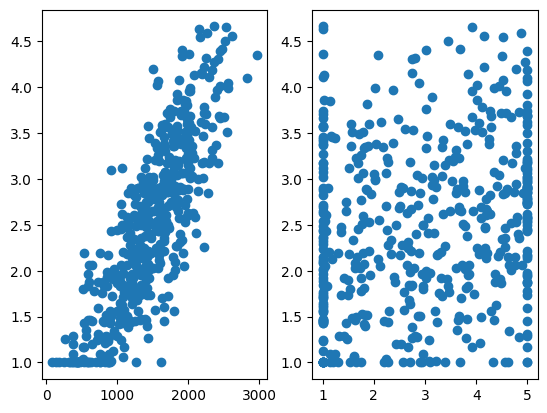

In [101]:
fig, ax = plt.subplots(1, 2)
ax[0].scatter(exam_score, grades_y)
ax[1].scatter(grade_in_highschool, grades_y)

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [102]:
ridge = Ridge(0.01).fit(grades_X, grades_y)
print("Tezine: " + str(ridge.intercept_) + " " + str(ridge.coef_))

Tezine: 0.15061179575776018 [0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
grades_X_fixed = scaler.fit_transform(grades_X)
# grades_y_fixed = scaler.fit_transform(np.array([grades_y]))
# grades_y_fixed = grades_y_fixed[0]
#Skaliranjem izlaza se dobiju samo nule, skaliramo samo ulazne varijable

ridge = Ridge(0.01).fit(grades_X_fixed, grades_y)
print("Tezine: " + str(ridge.intercept_) + " " + str(ridge.coef_))


Tezine: 2.5030316359918503 [0.73954683 0.13741539]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [105]:
grades_X_fixed_colinear = np.concatenate((grades_X_fixed, grades_X_fixed[:, 1:]), axis = 1)
print(grades_X_fixed_colinear)

[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [106]:
ridge = Ridge(0.01).fit(grades_X_fixed_colinear, grades_y)
print("Tezine: " + str(ridge.intercept_) + " " + str(ridge.coef_))

Tezine: 2.5030316359918503 [0.73954673 0.06870839 0.06870839]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [29]:
for alpha in [0.01, 1000]:
    print(f"-------- Model s lambda = {alpha} ---------- ")
    weights = np.zeros((10, 3))
    for i in range(10):
        grades_X_fixed_colinear_sampled, grades_y_sampled = split_dataset(grades_X_fixed_colinear, grades_y, 0.5)
        ridge = Ridge(alpha).fit(grades_X_fixed_colinear_sampled, grades_y_sampled)
        weights[i, :] = ridge.coef_
        print(ridge.coef_)
    print("Standardne devijacije")
    print(np.std(weights, axis = 0))

-------- Model s lambda = 0.01 ---------- 
[0.71920557 0.05892704 0.05892704]
[0.73147134 0.06895112 0.06895112]
[0.73760284 0.06951859 0.06951859]
[0.75435652 0.06779841 0.06779841]
[0.72238097 0.07260145 0.07260145]
[0.74149514 0.0409969  0.0409969 ]
[0.72555863 0.05567666 0.05567666]
[0.73579711 0.06023195 0.06023195]
[0.73838298 0.04026645 0.04026645]
[0.74222475 0.06744017 0.06744017]
Standardne devijacije
[0.00998988 0.01102516 0.01102516]
-------- Model s lambda = 1000 ---------- 
[0.14861882 0.02569236 0.02569236]
[0.15001655 0.02981747 0.02981747]
[0.14806889 0.02698539 0.02698539]
[0.14581591 0.02420753 0.02420753]
[0.1481734 0.0168046 0.0168046]
[0.13702007 0.03093263 0.03093263]
[0.15308795 0.0233904  0.0233904 ]
[0.1579169  0.02197535 0.02197535]
[0.13834029 0.03081006 0.03081006]
[0.1417413  0.02875428 0.02875428]
Standardne devijacije
[0.00611542 0.00425945 0.00425945]


**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.